In [4]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn

from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pprint import pprint
from IPython import display

In [5]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1076)>


False

In [6]:
seaborn.set(style='darkgrid', context='talk', palette='Dark2')

In [7]:
import pickle
pre_sentiment_df = pd.read_csv('./data/pre_soccer_replaced.csv') 
pre_sentiment_df_tokenized = pickle.load( open( "./data/pre_df_tk.p", "rb" ) )
teams=pd.read_csv("./data/teams.csv")
#post_sentiment_df = pd.read_csv(r'C:\Users\User\Downloads/post_soccer_sentiment.csv')

In [9]:
pre_sentiment_df=pd.merge(pre_sentiment_df,pre_sentiment_df_tokenized['pid	pcreated_date	ccreated_date	involved_teams'.split("	")].drop_duplicates("pid"),left_on="pid",right_on="pid")
pre_sentiment_df['ccreated_date']= [datetime.fromtimestamp(x) for x in pre_sentiment_df['ccreated'] ]

In [27]:
results = pd.read_csv("./data/results.csv")
post_soccer = pd.read_csv("./data/post_soccer_extraction.csv")

In [97]:
game= "ll8b6w"
team_sentiment=pre_sentiment_df[pre_sentiment_df['comment'].str.contains("Liverpool",na=False)]
prematch_senti=team_sentiment[team_sentiment['pid']==game]
#1. Sentiment score for a team all matches
#2. Sentiment score for a team for a match

In [99]:
diffs=prematch_senti['ccreated_date']-prematch_senti['pcreated_date']
hrs = [(dif.seconds/(60))/60 for dif in diffs]
prematch_senti['diff']=hrs
prematch_senti[prematch_senti['diff']<3]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ptitle  pscore     pid  \
105  [Pre-Match Thread] Leipzig vs Liverpool (Champ...    32.0  ll8b6w   
111  [Pre-Match Thread] Leipzig vs Liverpool (Champ...    32.0  ll8b6w   
113  [Pre-Match Thread] Leipzig vs Liverpool (Champ...    32.0  ll8b6w   
123  [Pre-Match Thread] Leipzig vs Liverpool (Champ...    32.0  ll8b6w   
128  [Pre-Match Thread] Leipzig vs Liverpool (Champ...    32.0  ll8b6w   
134  [Pre-Match Thread] Leipzig vs Liverpool (Champ...    32.0  ll8b6w   
148  [Pre-Match Thread] Leipzig vs Liverpool (Champ...    32.0  ll8b6w   
152  [Pre-Match Thread] Leipzig vs Liverpool (Champ...    32.0  ll8b6w   
153  [Pre-Match Thread] Leipzig vs Liverpool (Champ...    32.0  ll8b6w   
156  [Pre-Match Thread] Leipzig vs Liverpool (Champ...    32.0  ll8b6w   
158  [Pre-Match Thread] Leipzig vs Liverpool (Champ...    32.0  ll8b6w   
159  [Pre-Match Thread] Leipzig vs Liverpool (Champ...    32.0  ll8b6w   
176  [Pre-Match Thread] Leipzig vs Liverpool (Champ...    32.0  ll8b6w   
187  [Pre-Match Thread] Leipzig vs Liverpool (Champ...    32.0  ll8b6w   

                                                 pbody      pcreated  \
105  Pre-Match Thread: RB Leipzig vs Liverpool FC, ...  1.613524e+09   
111  Pre-Match Thread: RB Leipzig vs Liverpool FC, ...  1.613524e+09   
113  Pre-Match Thread: RB Leipzig vs Liverpool FC, ...  1.613524e+09   
123  Pre-Match Thread: RB Leipzig vs Liverpool FC, ...  1.613524e+09   
128  Pre-Match Thread: RB Leipzig vs Liverpool FC, ...  1.613524e+09   
134  Pre-Match Thread: RB Leipzig vs Liverpool FC, ...  1.613524e+09   
148  Pre-Match Thread: RB Leipzig vs Liverpool FC, ...  1.613524e+09   
152  Pre-Match Thread: RB Leipzig vs Liverpool FC, ...  1.613524e+09   
153  Pre-Match Thread: RB Leipzig vs Liverpool FC, ...  1.613524e+09   
156  Pre-Match Thread: RB Leipzig vs Liverpool FC, ...  1.613524e+09   
158  Pre-Match Thread: RB Leipzig vs Liverpool FC, ...  1.613524e+09   
159  Pre-Match Thread: RB Leipzig vs Liverpool FC, ...  1.613524e+09   
176  Pre-Match Thread: RB Leipzig vs Liverpool FC, ...  1.613524e+09   
187  Pre-Match Thread: RB Leipzig vs Liverpool FC, ...  1.613524e+09   

                                               comment               cauthor  \
105  The biggest win for Liverpool will be that no ...  Kind_Association2024   
111  Expecting a Leipzig win, Liverpool has been in...      CheekyFifaCunt_7   
113  Hope Liverpool have taken their caffeine pills...         Homer_Sapiens   
123  Nagelsmann is matching not only Liverpool’s fo...       HoodPhilosopher   
128  I haven't watched Liverpool play much. How is ...         ProMonkey2302   
134                      God help Liverpool if he does    WafflesOnToast1678   
148  Nope, I expect Liverpool to show a different f...     footballtriangles   
152                   I expect a 2-1 Liverpool win tbh               Bjdendi   
153  I think, it is either a reasonably comfortable...              dave1992   
156                                      3-0 Liverpool              Harudera   
158       I think it'll be a scrappy 2-1 Liverpool win        PegaponyPrince   
159                                 4-0 Liverpool win.           shrekonator   
176  Liverpool but I appreciate the benefit of the ...        TheLimeyLemmon   
187  Bundesliga clubs seem to enjoy play suicidal h...            Justinian2   

         ccreated       pcreated_date       ccreated_date  \
105  1.613525e+09 2021-02-16 20:04:24 2021-02-16 20:22:07   
111  1.613530e+09 2021-02-16 20:04:24 2021-02-16 21:43:50   
113  1.613533e+09 2021-02-16 20:04:24 2021-02-16 22:33:51   
123  1.613532e+09 2021-02-16 20:04:24 2021-02-16 22:17:20   
128  1.613527e+09 2021-02-16 20:04:24 2021-02-16 20:51:52   
134  1.613530e+09 2021-02-16 20:04:24 2021-02-16 21:52:14   
148  1.613525e+09 2021-02-16 20:04:24 2021-02-16 20:21:36   
152  1.613525e+09 2021-02-16 20:04:24 2021-02-16 20:17:08   
153  1.613526e+09 2021-02-16 20:04:24 2021-02-16 20:41:24   
156  1.613531e+09 2021-02-16 20:04:24 2021-02

In [104]:
prematch_senti[prematch_senti['diff']<3].shape

(14, 13)

In [93]:
from datetime import datetime

timestamp = 1613529713.0
dt_object = datetime.fromtimestamp(timestamp)
str(dt_object)


'2021-02-16 21:41:53'

In [26]:
game= "ll8b6w"
team_sentiment=pre_sentiment_df[pre_sentiment_df['comment'].str.contains("Leipzig",na=False)]
team_sentiment[team_sentiment['pid']==game]['sentiment_score'].mean()

0.166075

In [22]:
set(teams['Team Name']

Team Name         Other Name
0       Bayern  FC Bayern Munchen
1    Barcelona       FC Barcelona
2    Barcelona              Barca
3     Juventus               Juve
4   RealMadrid     Real Madrid CF
..         ...                ...
60   Tottenham          Tottenham
61       Inter              Inter
62       Inter       I Nerazzurri
63        Roma               Roma
64        Roma      I Giallorossi

[65 rows x 2 columns]

In [9]:
pre_sentiment_df.head(10)['comment'][0]

'If you can’t stop Sporting from winning the league at least make the country proud by winning against the old lady'

In [172]:
#import pickle5 as pickle
#df_tk_pre = pickle.load( open( "C:/Users/User/Downloads/pre_df_tk.p", "rb" ) )

In [11]:
pre_match = pre_sentiment_df['comment'].tolist()
#post_match = post_sentiment_df['comment'].tolist()

In [12]:
#Sentiment Analysis of match threads
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_score(line):
    score = analyser.polarity_scores(line)
    return score['compound']

In [19]:
pre_match

['If you can’t stop Sporting from winning the league at least make the country proud by winning against the old lady',
 "I don't follow Liga NOS closely, so any Portuguese friends want to give us a quick update on Porto's form, special players to look out for?",
 'Go on Porto, get that win so I can look at the match thread with some popcorn.',
 'It’s a shame that fans aren’t allowed in stadiums because I think it would have been lovely to see the reception for Danilo and Alex Sandro’s return.   Ronaldo fucking *loves* playing against Porto, so it should be fun to see a struggling defense try to contain him.   This seems like the ultimate “who has the more lethargic midfield” battle.',
 "Juventusntus will take this easily ,porto is a fairly decent team in the UCL but they're quite bad this season and theres no supporters which is what made the Estadio do Dragão a hard stadium to play in.",
 'Oh, Cuadrado is injured. Sucks, I was looking forward to the Colombian match-up.',
 'Marega mast

In [13]:
# Get list of sentiment scores for pre match comments
results_pre = []
for line in pre_match:
    sentiment_score = sentiment_analyzer_score(str(line))
    results_pre.append(sentiment_score)

In [14]:
pre_sentiment_df['sentiment_score'] = results_pre
pre_sentiment_df.head()

ptitle  pscore     pid  \
0  [Pre-Match Thread] Porto vs Juventusntus (Cham...    64.0  lls3ua   
1  [Pre-Match Thread] Porto vs Juventusntus (Cham...    64.0  lls3ua   
2  [Pre-Match Thread] Porto vs Juventusntus (Cham...    64.0  lls3ua   
3  [Pre-Match Thread] Porto vs Juventusntus (Cham...    64.0  lls3ua   
4  [Pre-Match Thread] Porto vs Juventusntus (Cham...    64.0  lls3ua   

                                               pbody      pcreated  \
0  **Porto vs Juventus**\n\nCompetition: UEFA Cha...  1.613589e+09   
1  **Porto vs Juventus**\n\nCompetition: UEFA Cha...  1.613589e+09   
2  **Porto vs Juventus**\n\nCompetition: UEFA Cha...  1.613589e+09   
3  **Porto vs Juventus**\n\nCompetition: UEFA Cha...  1.613589e+09   
4  **Porto vs Juventus**\n\nCompetition: UEFA Cha...  1.613589e+09   

                                             comment       cauthor  \
0  If you can’t stop Sporting from winning the le...        idek0k   
1  I don't follow Liga NOS closely, so any Portug...     kuzjaruge   
2  Go on Porto, get that win so I can look at the...  TweakyWatson   
3  It’s a shame that fans aren’t allowed in stadi...   rabbitvinyl   
4  Juventusntus will take this easily ,porto is a...    NunoxGames   

       ccreated       pcreated_date       ccreated_date     involved_teams  \
0  1.613592e+09 2021-02-17 14:07:53 2021-02-17 15:07:27  Juventus vs Porto   
1  1.613590e+09 2021-02-17 14:07:53 2021-02-17 15:07:27  Juventus vs Porto   
2  1.613591e+09 2021-02-17 14:07:53 2021-02-17 15:07:27  Juventus vs Porto   
3  1.613596e+09 2021-02-17 14:07:53 2021-02-17 15:07:27  Juventus vs Porto   
4  1.613591e+09 2021-02-17 14:07:53 2021-02-17 15:07:27  Juventus vs Porto   

   sentiment_score  
0           0.8271  
1           0.7479  
2           0.5859  
3           0.2315  
4          -0.1937

In [15]:
# #Sentiment Analysis of Post match threads
# results_post = []
# for line in post_match:
#     sentiment_score = sentiment_analyzer_score(line)
#     results_post.append(sentiment_score)

NameError: name 'post_match' is not defined

In [16]:
# post_tokenised_df['Sentiment_score'] = results_post
# post_tokenised_df.head()

NameError: name 'post_tokenised_df' is not defined

In [189]:
# post_tokenised_df.groupby('ptitle')['Sentiment_score'].mean()


ptitle
Post Match Thread: Arsenal 0-0 Manchester United | English Premier League                                0.073901
Post Match Thread: Arsenal 3 Chelsea 1                                                                   0.127012
Post Match Thread: Aston Villa vs Arsenal | English Premier League                                       0.132213
Post Match Thread: FC Barcelona 1-4 Paris Saint-Germain | UEFA Champions League Round of 16 First Leg    0.121376
Post Match Thread: Leeds United 1 - 2 Everton                                                            0.218959
                                                                                                           ...   
Post-Match Thread: West Bromwich Albion 1-1 Manchester United [Premier League, Round 24]                 0.118709
Post-Match Thread: West Ham United 1 - 3 Liverpool | English Premier League                              0.154662
Post-Match Thread: West Ham United 3-0 Sheffield United | Premier League         

In [20]:
pre_sentiment_df['involved_teams']

0           Juventus vs Porto
1           Juventus vs Porto
2           Juventus vs Porto
3           Juventus vs Porto
4           Juventus vs Porto
                 ...         
14585    Liverpool vs ManCity
14586    Liverpool vs ManCity
14587    Liverpool vs ManCity
14588    Liverpool vs ManCity
14589    Liverpool vs ManCity
Name: involved_teams, Length: 14590, dtype: object

In [21]:
pre_sentiment_df.groupby('ptitle')['sentiment_score'].mean()

ptitle
Pre Match Thread: Liverpool F.C. vs Chelsea F.C. [UEFA Super Cup]                                          0.190312
Pre Match Thread: Liverpool vs. Roma [UEFA Champions League Semifinal]                                     0.206141
Pre Match Thread: Manchester ManCity vs Arsenal | Premier League                                           0.128374
Pre Match Thread: RealMadrid Madrid vs. Liverpool [Champions League Final]                                 0.128429
Pre Match Thread: Tottenham vs. Liverpool [UEFA Champions League Final]                                    0.150289
Pre-Match Thread : Barcelona - Bayern Munich [UEFA Champions League - Quarterfinal]                        0.149412
Pre-Match Thread : Inter - Shakhtar Donetsk [UEFA Europa League - Semifinal]                               0.216498
Pre-Match Thread : Manchester ManCity - Lyon [UEFA Champions League - Quarterfinal]                        0.159320
Pre-Match Thread : Sevilla - Manchester ManUnited [UEFA Europa Le

In [ ]:
### TO BE WORKED UPON 

Pre Match Sentiment

In [139]:
#print("Positive Comments:\n")
#pprint(list(df[df['label'] == 1].comment)[:20], width=200)

#print("\nNegative Comments:\n")
#pprint(list(df[df['label'] == -1].comment)[:20], width=200)

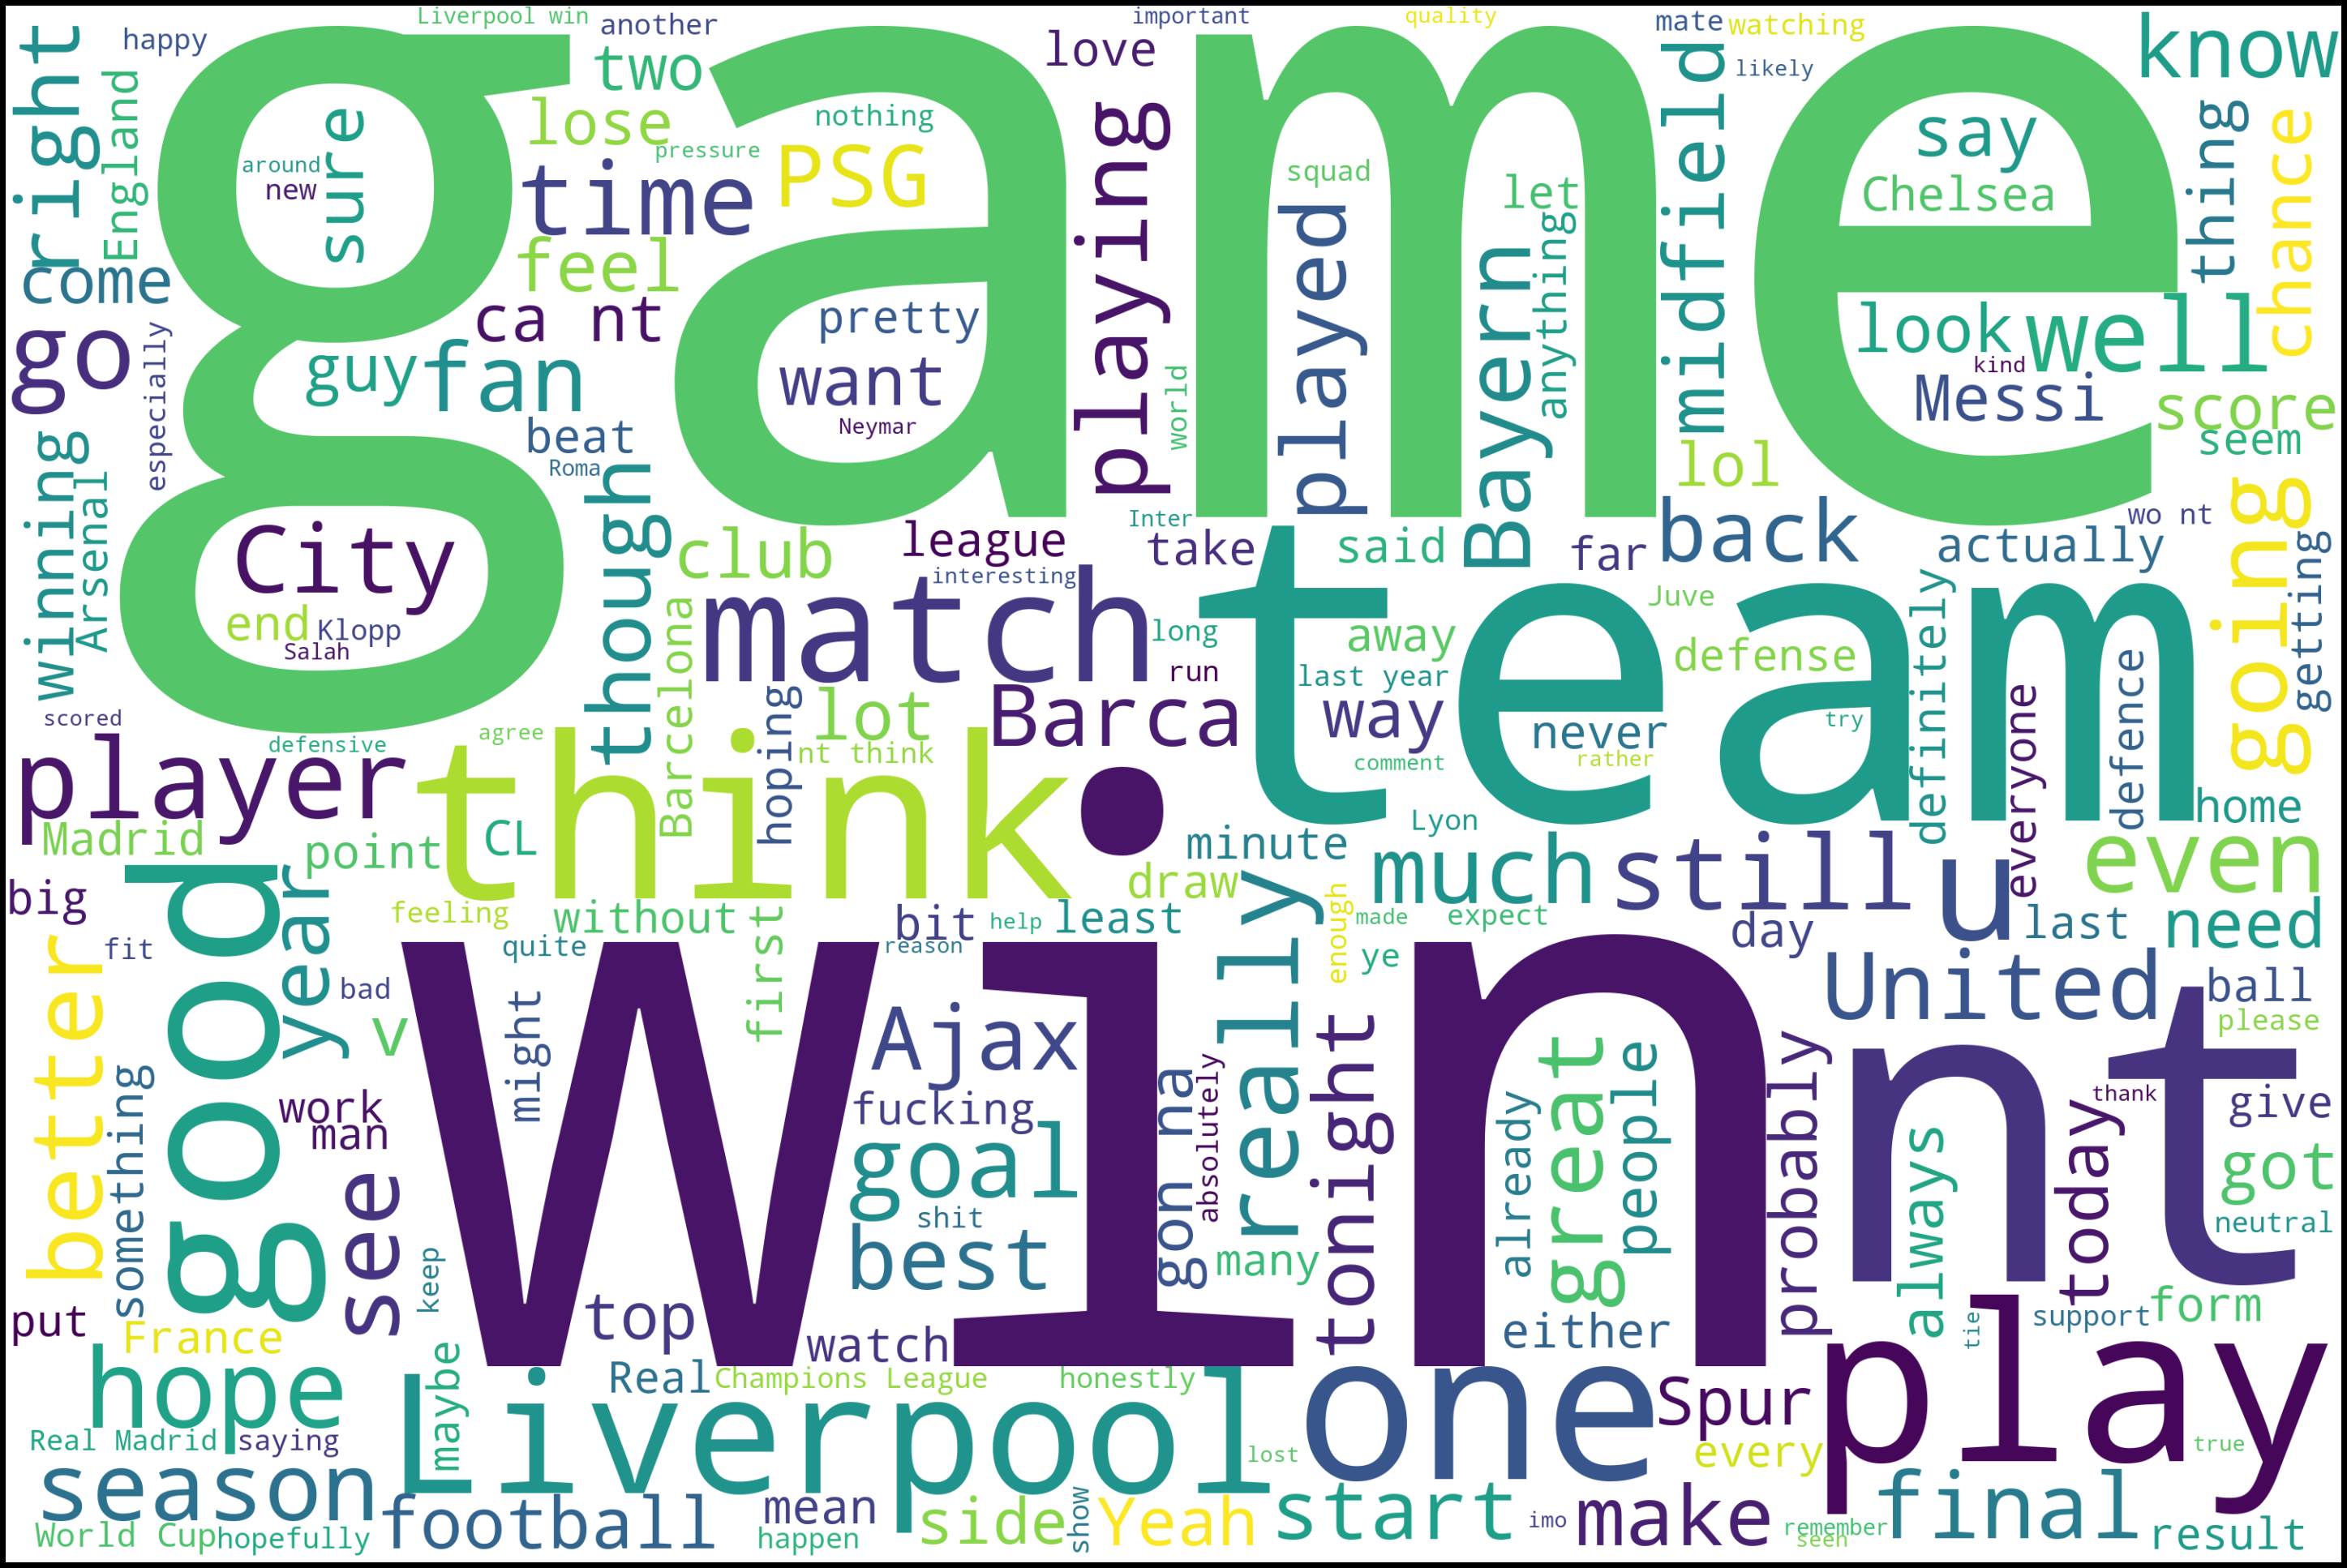

In [138]:
#Positive Words
positive_comments = df[df['label'] == 1]


wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(' '.join(positive_comments['comment']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

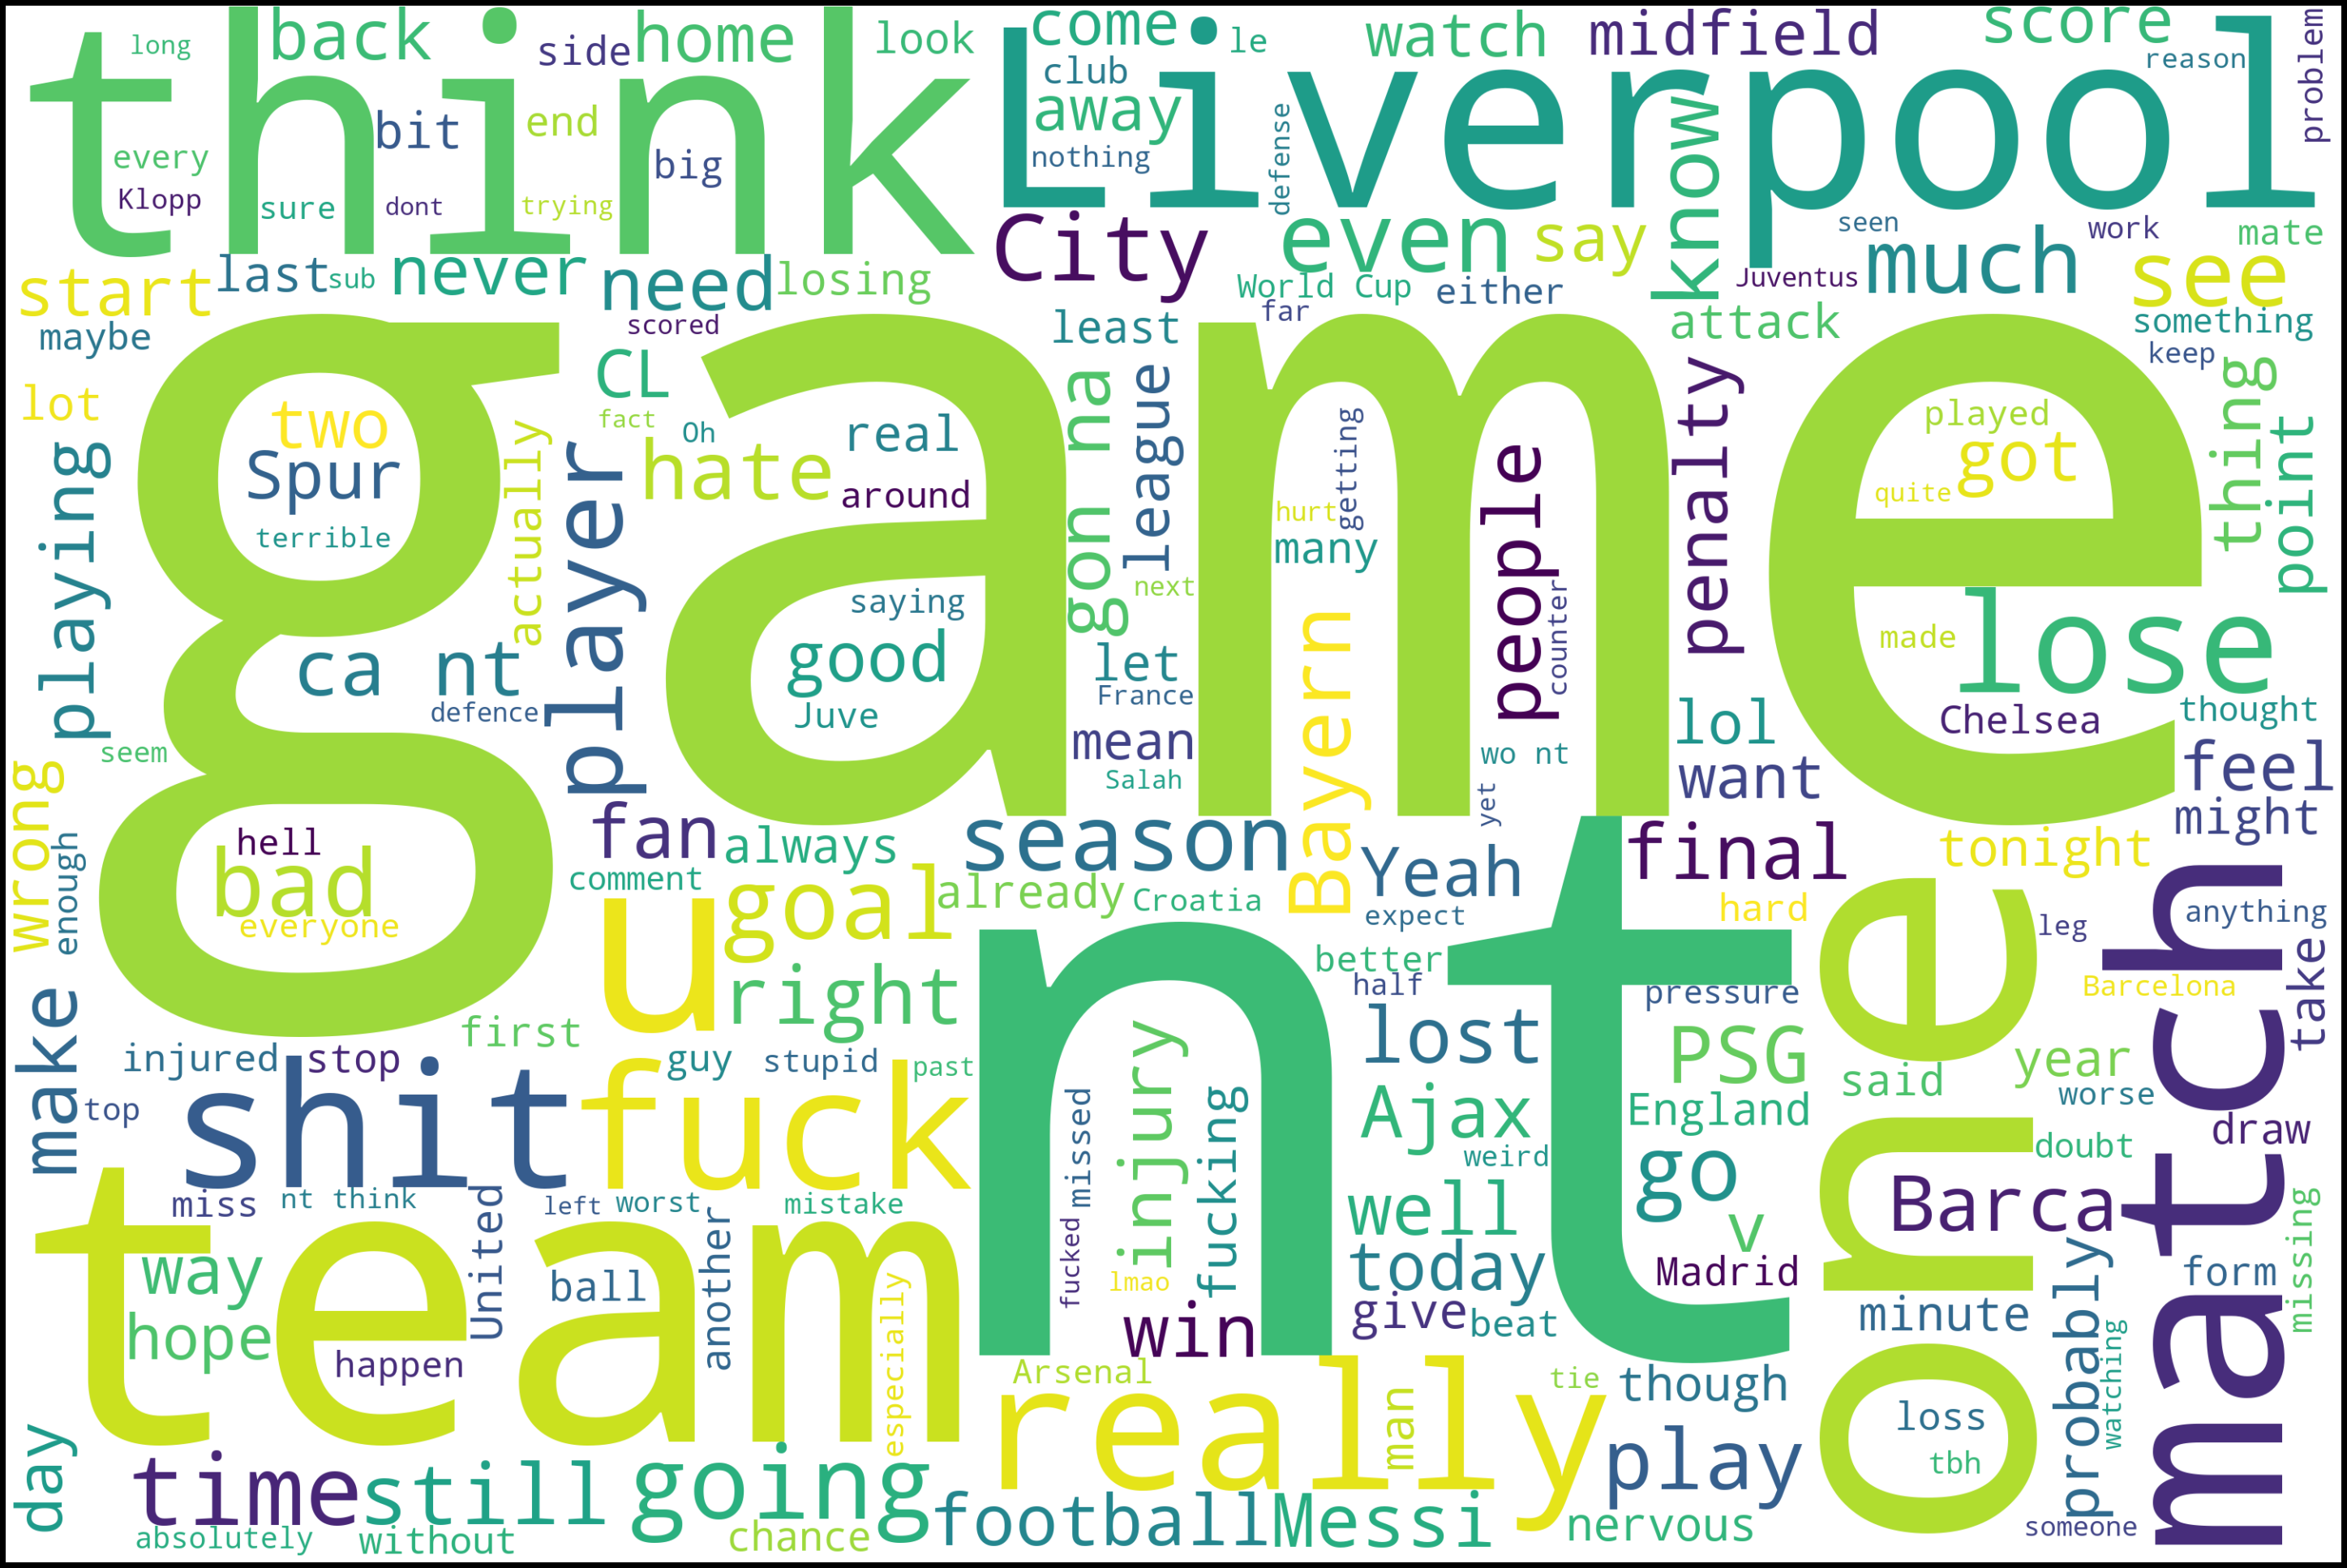

In [140]:
#Negative Comments
negative_comments = df[df['label'] == -1]

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(' '.join(negative_comments['comment']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

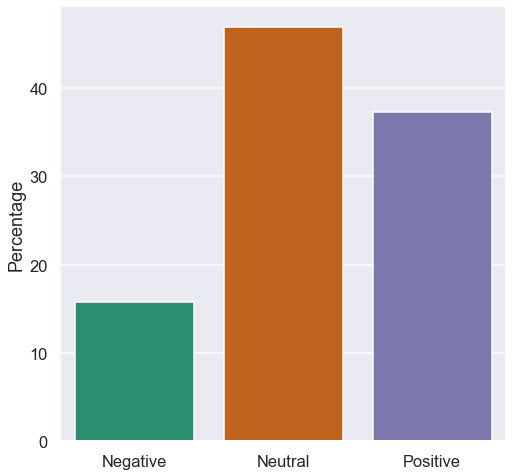

In [141]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

seaborn.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

Post Match Sentiment

In [142]:
#print("Positive Comments:\n")
#pprint(list(df1[df1['label'] == 1].comment)[:20], width=200)

#print("\nNegative Comments:\n")
#pprint(list(df1[df1['label'] == -1].comment)[:20], width=200)

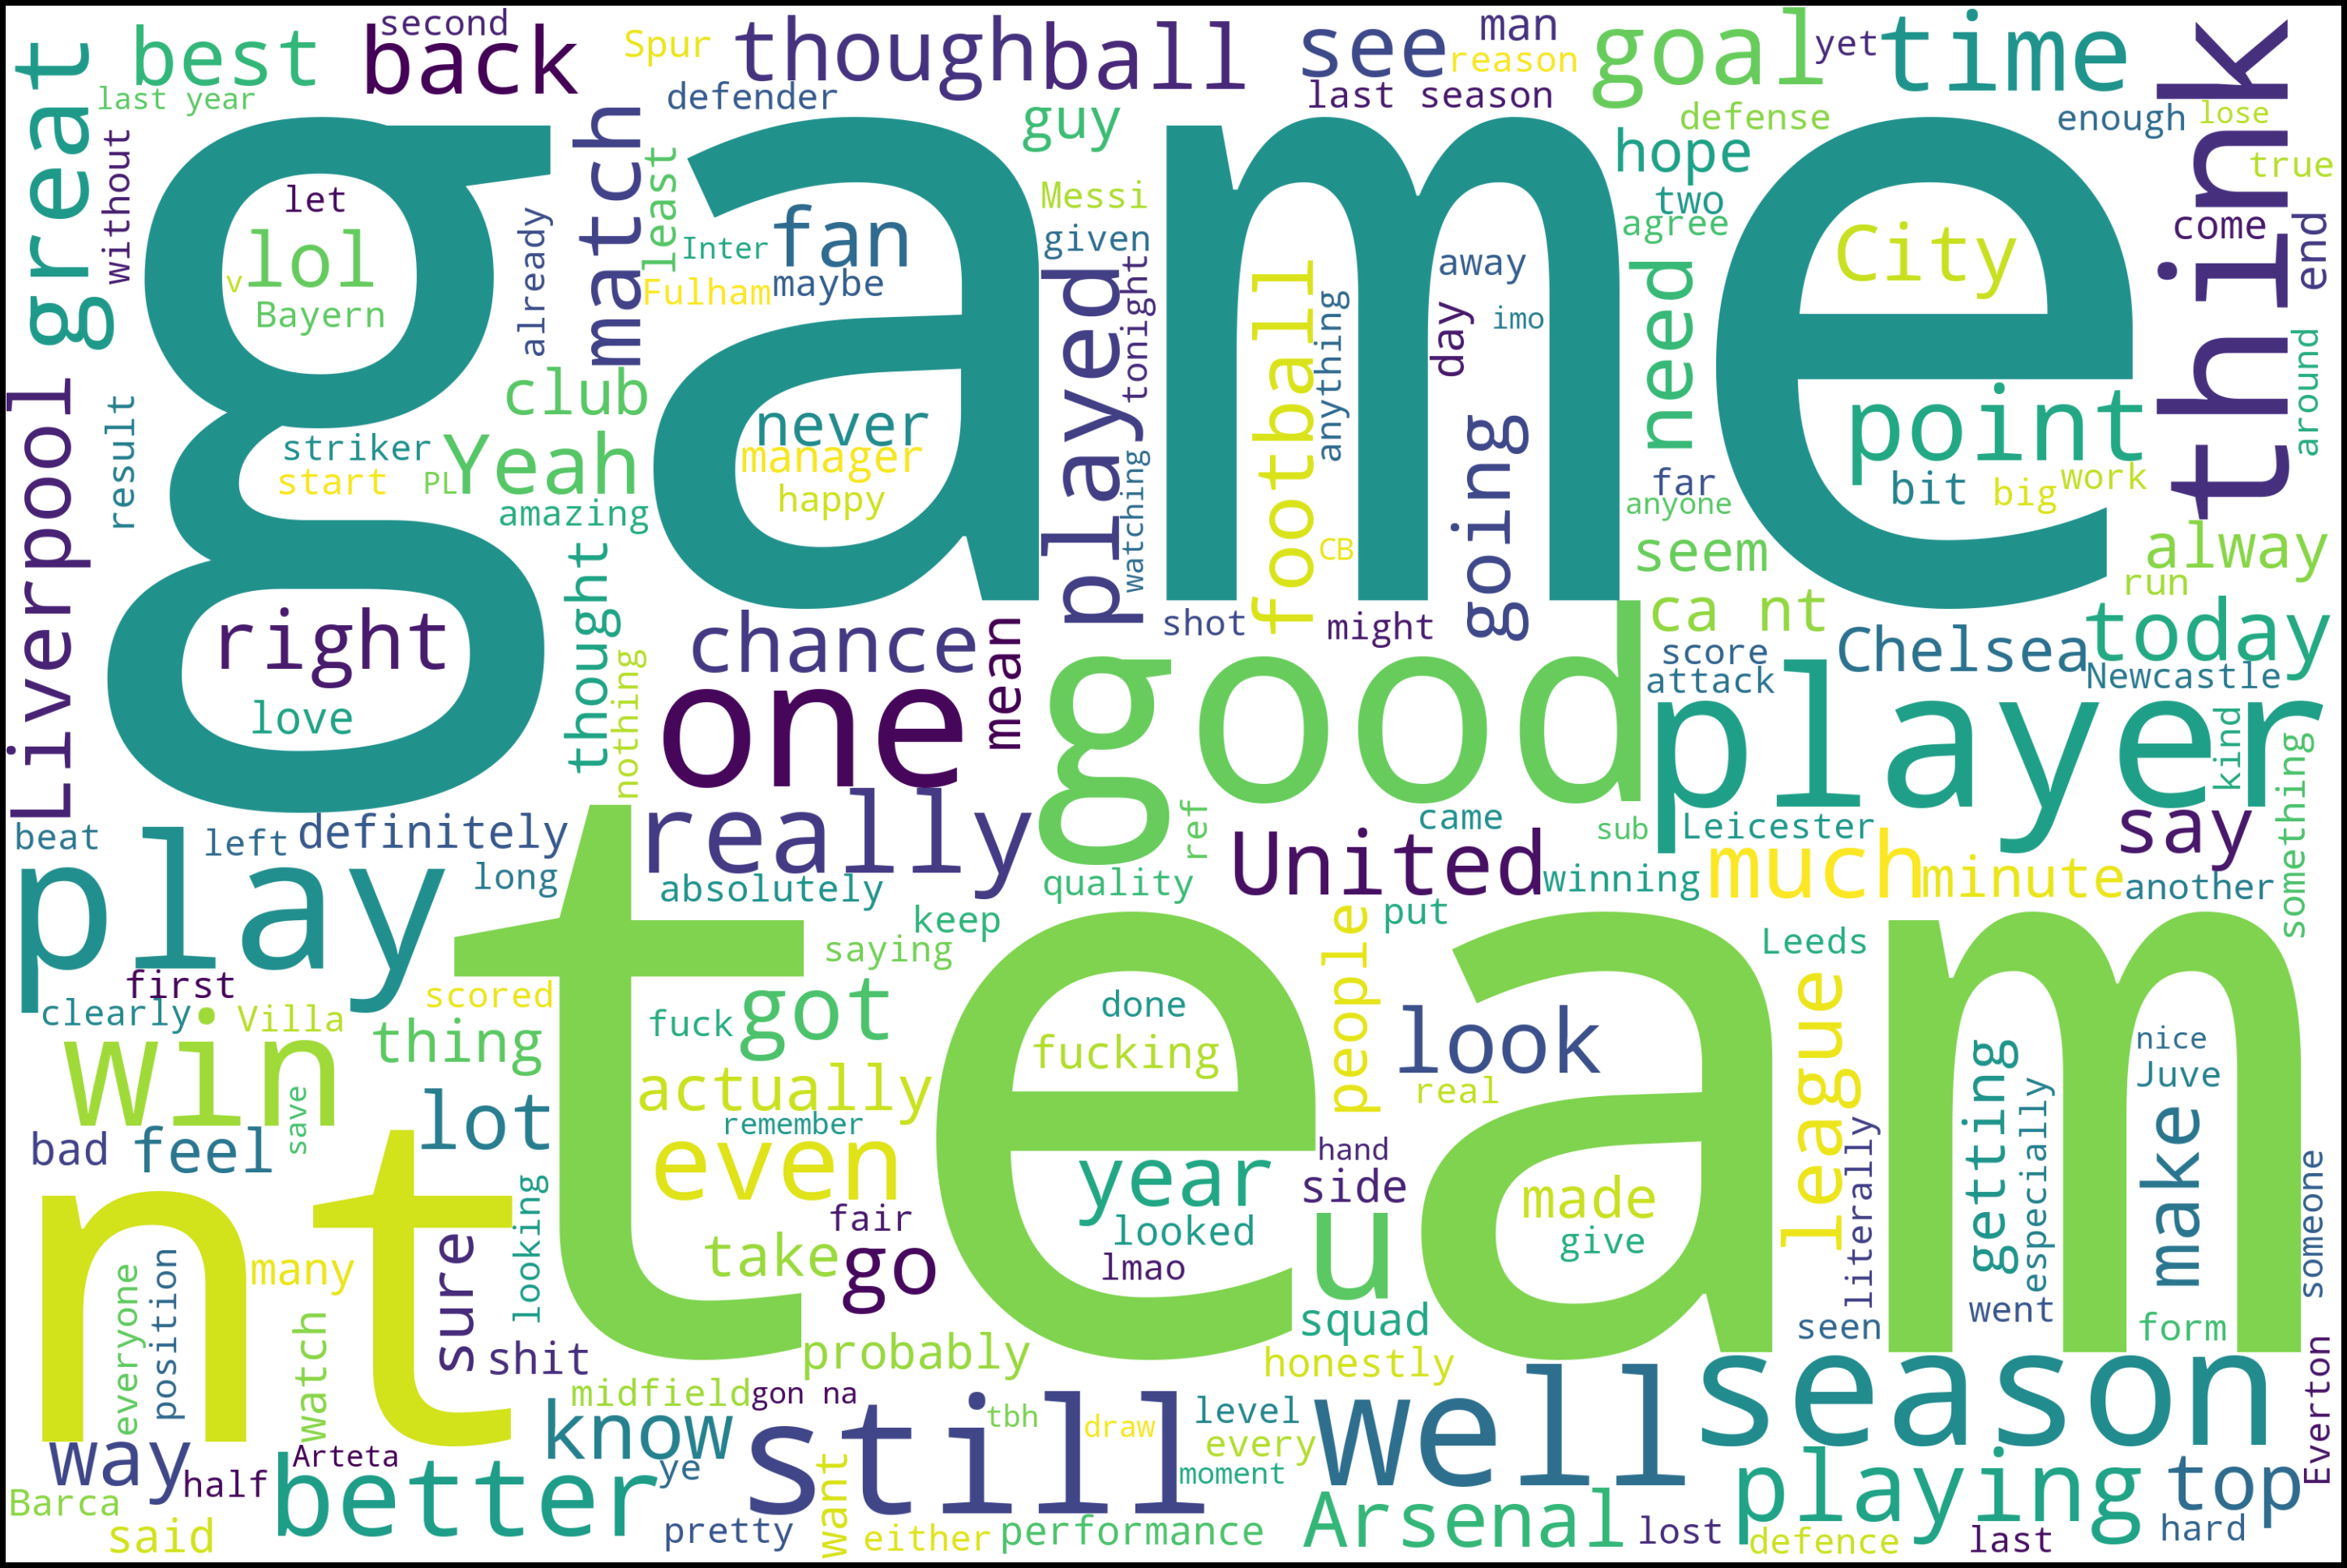

In [143]:
#Positive Words
positive_comments = df1[df1['label'] == 1]


wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(' '.join(positive_comments['comment']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

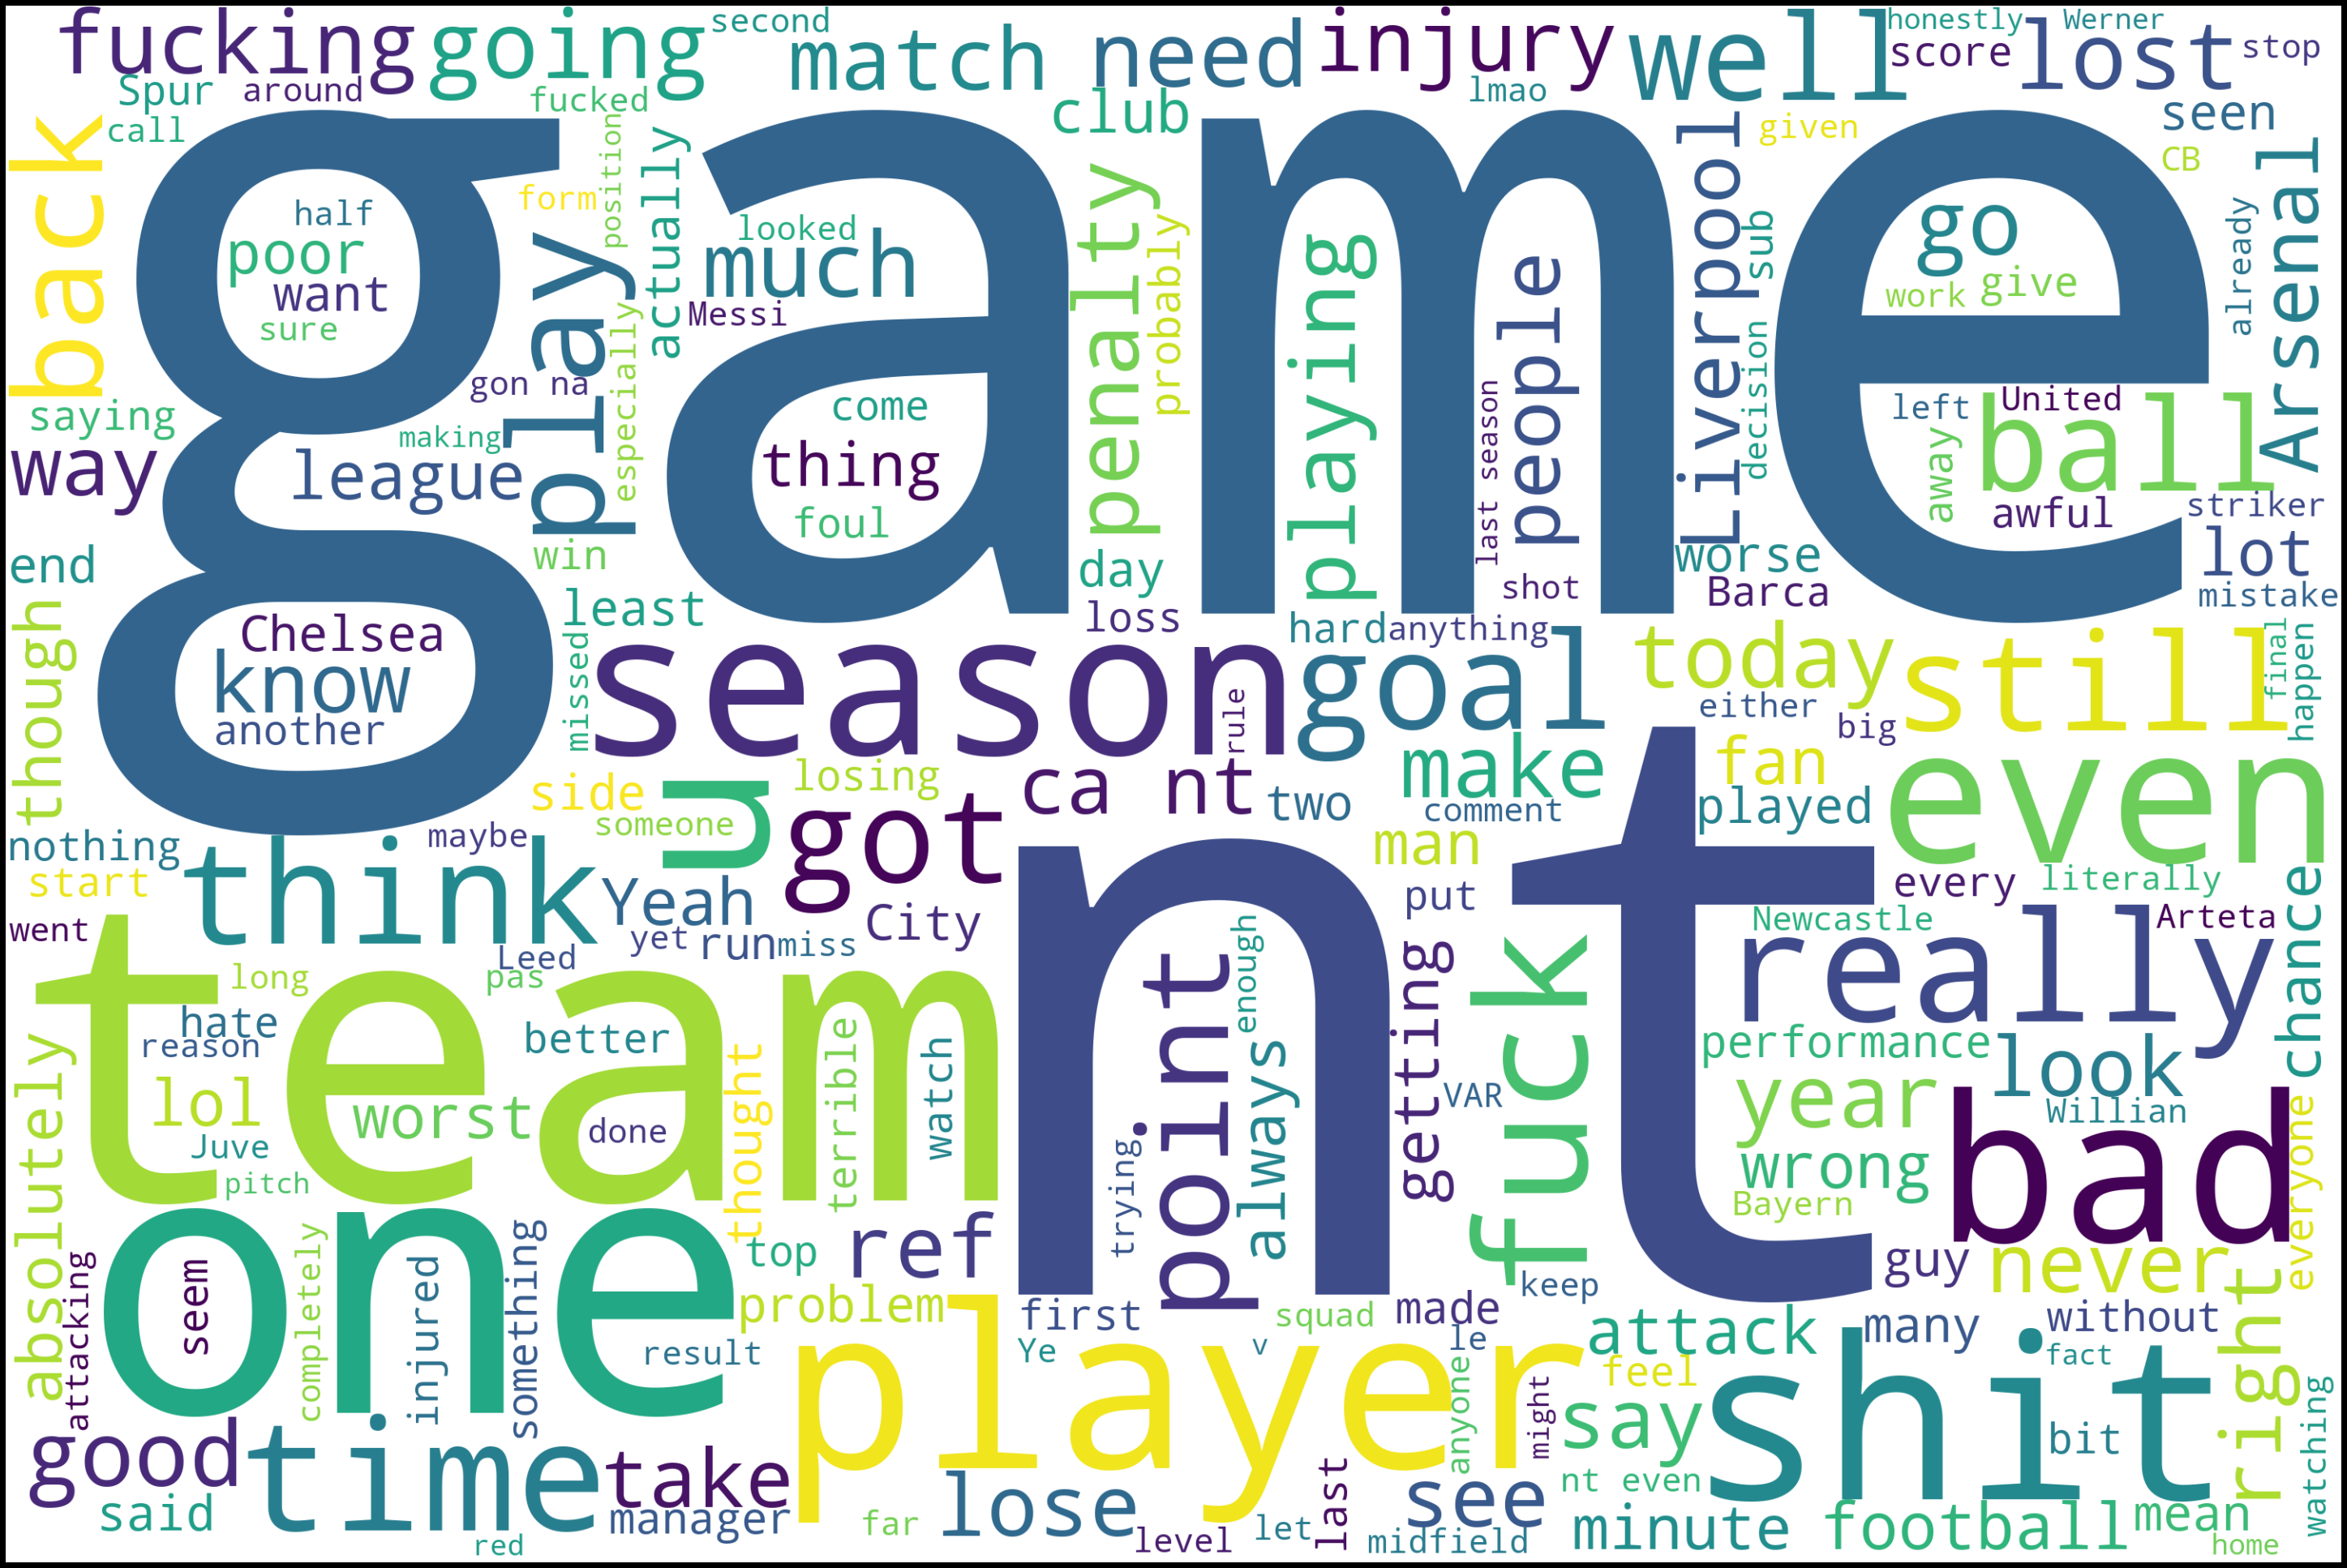

In [144]:
#Negative Comments
negative_comments = df1[df1['label'] == -1]

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(' '.join(negative_comments['comment']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

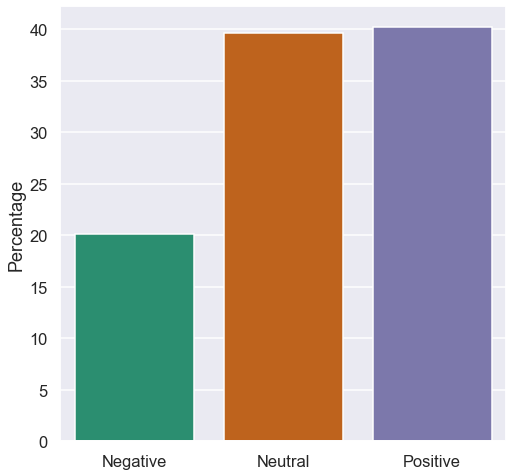

In [145]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df1.label.value_counts(normalize=True) * 100

seaborn.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()